In [15]:
import pandas as pd # Dataframe, series
import numpy as np  # Scientific computing package - Array

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Spotify Song Attributes EDA
- Import Data
- EDA to visualize data and observe structure

In [16]:
data = pd.read_csv('edm_songs.csv')

In [17]:
data.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,10499.500000,0.602479,0.871618,5.600952,-5.869761,0.514667,0.093811,0.022772,0.497083,0.233391,0.294768,143.431358,309236.525095,3.976714
std,6062.322162,0.144944,0.116026,3.623975,2.862706,0.499797,0.091243,0.062071,0.372952,0.195299,0.215407,15.669134,105583.387028,0.192434
min,0.000000,0.089100,0.188000,0.000000,-26.172000,0.000000,0.025300,0.000001,0.000000,0.010700,0.018700,115.988000,25600.000000,1.000000
25%,5249.750000,0.499000,0.819000,2.000000,-7.602000,0.000000,0.046700,0.000485,0.039500,0.097400,0.122000,129.046000,220014.250000,4.000000
50%,10499.500000,0.596000,0.909000,6.000000,-5.768000,1.000000,0.060100,0.002810,0.642500,0.145000,0.243000,140.094500,285237.000000,4.000000
75%,15749.250000,0.716000,0.957000,9.000000,-3.870000,1.000000,0.092600,0.015025,0.852000,0.331000,0.416000,150.024000,395627.000000,4.000000
max,20999.000000,0.988000,1.000000,11.000000,3.108000,1.000000,0.906000,0.985000,0.985000,0.988000,0.988000,181.968000,913052.000000,5.000000


In [18]:
columns = ['acousticness', 'instrumentalness', 'speechiness', 'danceability',
           'liveness', 'valence', 'energy', 'key', 'loudness', 'mode', 'tempo',
           'time_signature', 'duration_ms', 'genre']

data = data[columns]

In [19]:
data.head()

,acousticness,instrumentalness,speechiness,danceability,liveness,valence,energy,key,loudness,mode,tempo,time_signature,duration_ms,genre
0,0.000957,0.920,0.0811,0.806,0.1130,0.580,0.950,7,-6.782,1,127.997,4,197499,techhouse
1,0.000130,0.888,0.0599,0.803,0.3560,0.350,0.697,6,-9.479,1,126.008,4,507998,techhouse
2,0.062300,0.908,0.0420,0.729,0.0353,0.778,0.978,10,-6.645,1,124.994,4,206000,techhouse
3,0.019100,0.812,0.0405,0.724,0.1080,0.346,0.792,4,-8.555,0,124.006,4,199839,techhouse
4,0.053000,0.418,0.2570,0.700,0.5740,0.791,0.898,8,-6.099,1,125.031,4,173861,techhouse


## Data Visualization

In [20]:
# Custom Color Palette
sns.set_style('dark')

#### Tempo ranges for genres 
- Dub: 60-90 bpm
- Hip-hop: 60-100 bpm
- House: 115-130 bpm
- Techno/trance: 120-140 bpm
- Dubstep: 135-145 bpm
- Drum and bass: 160-180 bpm  
https://learningmusic.ableton.com/make-beats/tempo-and-genre.html

## Distribution Plots

In [21]:
data.genre.unique()

array(['techhouse', 'techno', 'trance', 'psytrance', 'trap', 'dnb',
       'hardstyle'], dtype=object)

In [22]:
genres = data.genre.unique()

In [23]:
techhouse_tempo = data[data['genre'] == 'techhouse']['tempo']
techno_tempo = data[data['genre'] == 'techno']['tempo']
trance_tempo = data[data['genre'] == 'trance']['tempo']
psytrance_tempo = data[data['genre'] == 'psytrance']['tempo']
trap_tempo = data[data['genre'] == 'trap']['tempo']
dnb_tempo = data[data['genre'] == 'dnb']['tempo']
hardstyle_tempo = data[data['genre'] == 'hardstyle']['tempo']

In [24]:
def graph_tempo(genre, df):
    tempo = data.loc[data.genre == genre, 'tempo']
    plt.title('Song Tempo')
    plt.hist(tempo, bins=40, range=(min(data.tempo), max(data.tempo)), alpha=0.7,label=genre)
    plt.grid(b=True)
    plt.legend(loc='upper right')
    plt.xlabel('Tempo')
    plt.ylabel('Count')

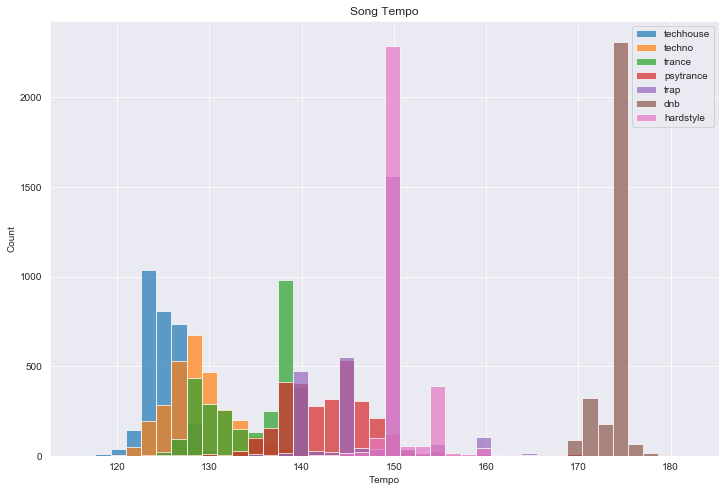

In [25]:
fig = plt.figure(figsize=(12,8))
plt.title('Song Tempo')

for genre in genres:
    graph_tempo(genre, data)

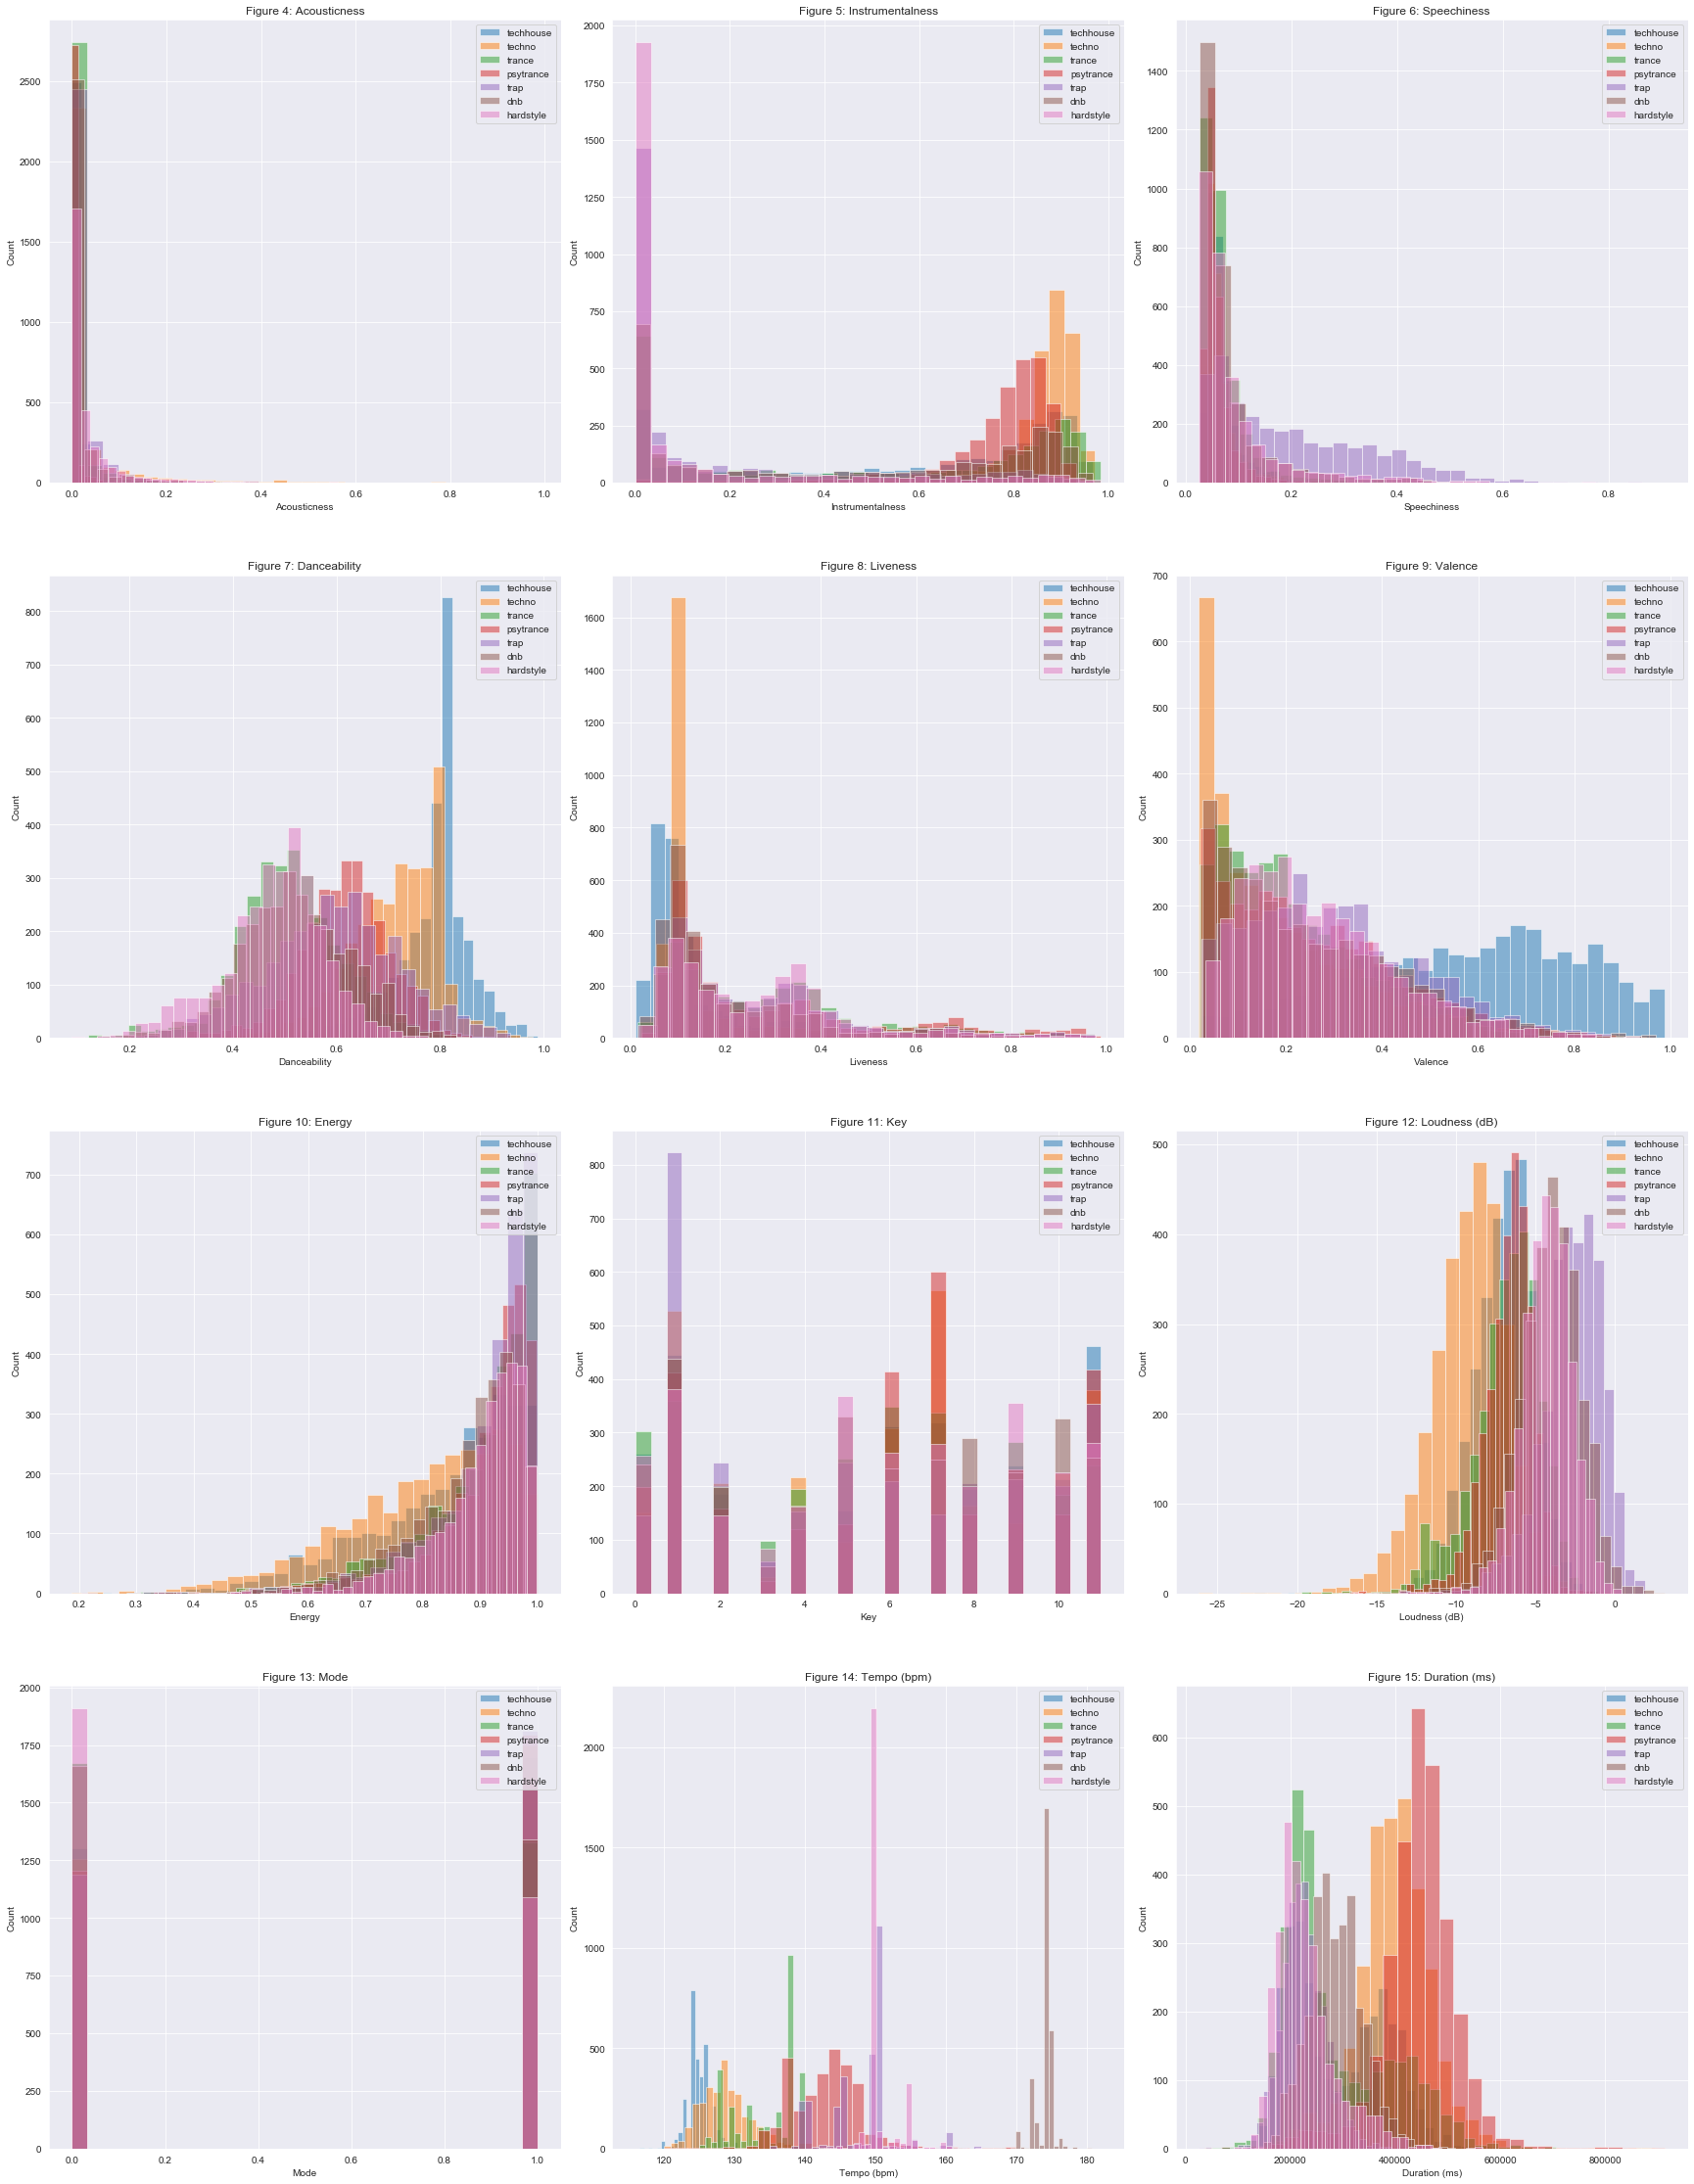

In [37]:
features = ['acousticness', 'instrumentalness', 'speechiness', 'danceability',
           'liveness', 'valence', 'energy', 'key', 'loudness', 'mode', 'tempo', 'duration_ms']

xlabels = ['Acousticness', 'Instrumentalness', 'Speechiness', 'Danceability',
          'Liveness', 'Valence', 'Energy', 'Key', 'Loudness (dB)',
          'Mode', 'Tempo (bpm)', 'Duration (ms)']

fig3, ax2d = plt.subplots(nrows=4, ncols=3)
fig3.set_size_inches(30,40)
fig3.subplots_adjust(wspace=0.1)

ax = np.ravel(ax2d)

for i,feature in enumerate(features):
    ax[i].set_xlabel(xlabels[i])
    ax[i].set_ylabel('Count')
    ax[i].set_title('Figure {}: {}'.format(i+4, xlabels[i]))
    ax[i].hist(data[data['genre'] == 'techhouse'][feature], alpha=0.5, bins=30, label='techhouse')
    ax[i].hist(data[data['genre'] == 'techno'][feature], alpha=0.5, bins=30, label='techno')
    ax[i].hist(data[data['genre'] == 'trance'][feature], alpha=0.5, bins=30, label='trance')
    ax[i].hist(data[data['genre'] == 'psytrance'][feature], alpha=0.5, bins=30, label='psytrance')
    ax[i].hist(data[data['genre'] == 'trap'][feature], alpha=0.5, bins=30, label='trap')
    ax[i].hist(data[data['genre'] == 'dnb'][feature], alpha=0.5, bins=30, label='dnb')
    ax[i].hist(data[data['genre'] == 'hardstyle'][feature], alpha=0.5, bins=30, label='hardstyle')    
    ax[i].legend(loc='upper right')
    ax[i].grid(1)

In [14]:
foo = data.groupby('genre').describe()

In [15]:
foo['tempo']

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
dnb,3000.0,173.843173,1.336296,161.660,173.9460,174.0060,174.09000,181.968
hardstyle,3000.0,150.808505,2.339603,140.267,149.9530,150.0080,150.09000,164.983
psytrance,3000.0,142.835830,5.054874,120.007,139.9770,143.0170,145.05300,169.999
techhouse,3000.0,124.924629,1.769401,115.988,123.9960,124.9955,125.99900,134.017
techno,3000.0,129.213673,4.318577,120.001,126.0100,128.0180,131.00725,150.000
trance,3000.0,134.630759,4.445586,125.000,130.0195,136.0100,138.00400,150.110
trap,3000.0,147.762937,4.872136,135.019,144.9810,149.9420,150.04000,164.920


In [16]:
foo['danceability']

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
dnb,3000.0,0.520877,0.106956,0.1380,0.449,0.5165,0.59225,0.855
hardstyle,3000.0,0.478675,0.099950,0.0891,0.425,0.4900,0.54200,0.826
psytrance,3000.0,0.616325,0.087088,0.2900,0.565,0.6200,0.67125,0.925
techhouse,3000.0,0.786642,0.073662,0.3680,0.756,0.8020,0.82000,0.988
techno,3000.0,0.714229,0.088972,0.2540,0.660,0.7280,0.78300,0.978
trance,3000.0,0.507682,0.102210,0.1210,0.446,0.5060,0.56800,0.887
trap,3000.0,0.592924,0.128899,0.1500,0.511,0.5965,0.68000,0.935


In [17]:
foo['duration_ms']

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
dnb,3000.0,286489.339667,51777.884632,35862.0,251210.00,285257.0,319179.50,514629.0
hardstyle,3000.0,228970.819667,58325.255869,91617.0,190411.50,215988.5,252000.00,566495.0
psytrance,3000.0,445592.912333,70355.139643,108000.0,413133.50,448444.0,483288.00,913052.0
techhouse,3000.0,291912.381667,91133.079309,67431.0,210547.00,274175.0,371542.25,596191.0
techno,3000.0,398903.237000,69941.975121,119629.0,361847.50,399567.0,438720.00,894386.0
trance,3000.0,287504.880667,103343.245042,48667.0,210563.75,243447.0,368317.25,705131.0
trap,3000.0,225282.104667,41472.206282,25600.0,198400.00,223448.0,250300.75,392683.0
